<a href="https://colab.research.google.com/github/Luca-Davis/Luca-Bio108-Tutorial/blob/main/W10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 20.1 MB/s eta 0:00:00


In [2]:
!pip install earthpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.0 MB/s eta 0:00:00


# New Section

In [3]:
import rasterio
import rasterio.plot
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
g_path = ("/content/drive/MyDrive/Classes Spring 2025/Conservation Coding/data/ne_50m_glaciated_areas.shp")
# assign glacier file to variable (contains more than just shp!)

In [20]:
glacier = gpd.read_file(g_path)
glacier.crs
glacier

#using geopandas to read glacier files and get coordinate system and show the data frame.

,scalerank,featurecla,min_zoom,geometry
0,4,Glaciated Areas,3.0,"POLYGON ((-67.50732 82.27741, -67.50732 82.277..."
1,4,Glaciated Areas,3.0,"POLYGON ((-80.49573 82.32397, -80.49573 82.323..."
2,4,Glaciated Areas,3.0,"POLYGON ((-84.97145 82.29043, -84.97145 82.290..."
3,4,Glaciated Areas,3.0,"POLYGON ((-83.60148 82.19462, -83.60148 82.194..."
4,3,Glaciated Areas,2.1,"POLYGON ((-85.31422 81.61202, -85.31422 81.612..."
...,...,...,...,...
372,3,Glaciated Areas,2.1,"POLYGON ((55.71673 81.18848, 55.71673 81.18848..."
373,3,Glaciated Areas,2.1,"POLYGON ((56.31556 80.63286, 56.31556 80.63286..."
374,4,Glaciated Areas,3.0,"POLYGON ((58.76151 80.99097, 58.76151 80.99097..."
375,4,Glaciated Areas,3.0,"POLYGON ((62.57306 81.63305, 62.57306 81.63305..."


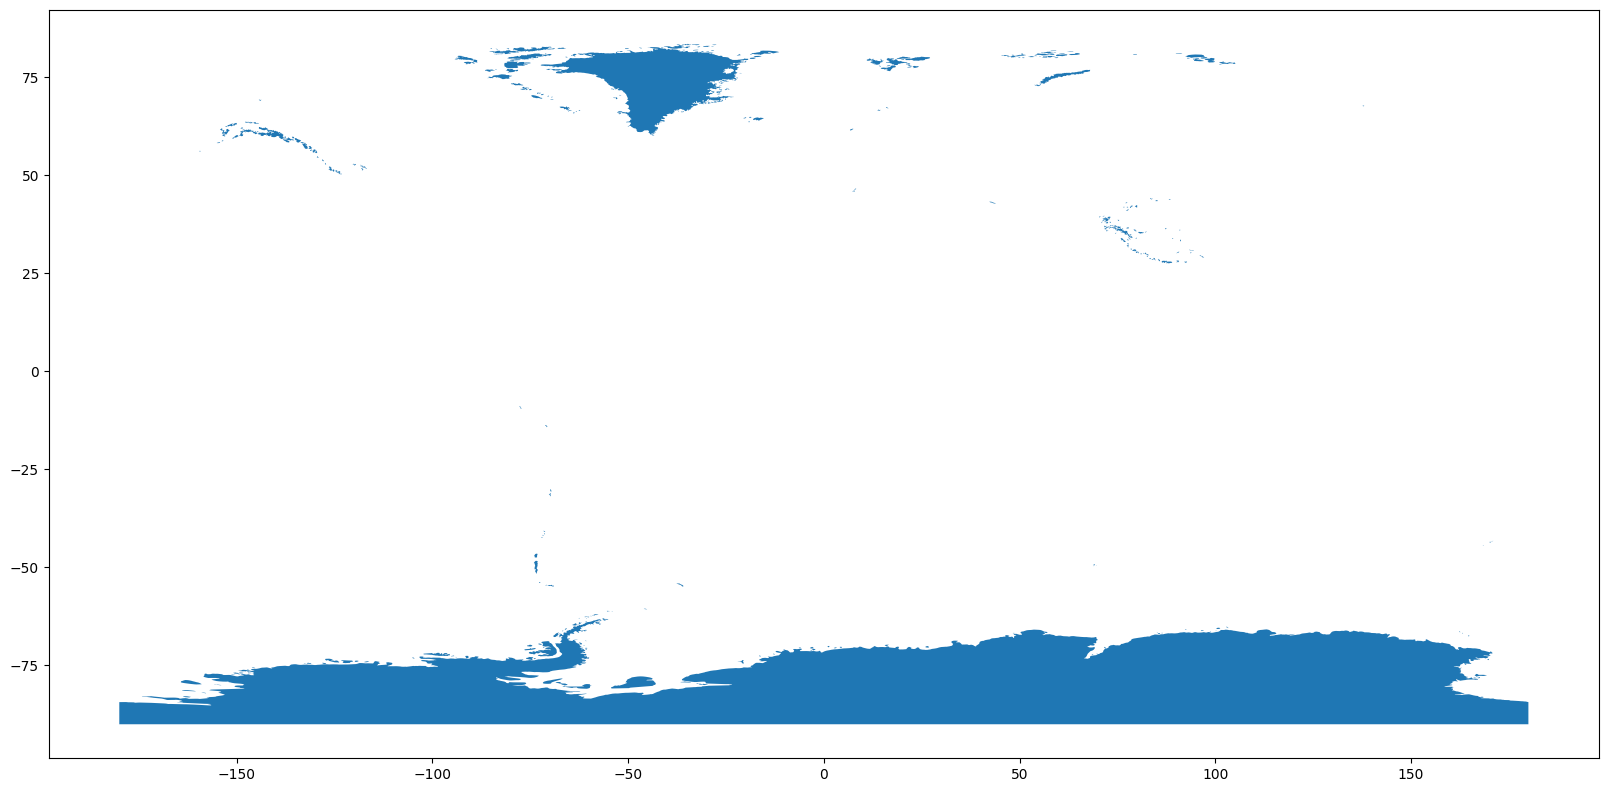

In [21]:
fig, ax = plt.subplots(figsize = (20,10))
glacier.plot(ax=ax)
plt.show()
#plotting glacier shapefile

In [7]:
c_path = ("/content/drive/MyDrive/Classes Spring 2025/Conservation Coding/data/ne_10m_admin_0_countries.zip (Unzipped Files)/ne_10m_admin_0_countries.shp")
ctry = gpd.read_file(c_path)
ctry
#assigning url to country boundaries file and calling the dataframe using geopandas


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,1,Peru,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Admin-0 country,0,4,China,CH1,1,2,Country,1,Macao S.A.R,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((113.5586 22.16303, 113.56943 2..."
254,Admin-0 country,6,5,Australia,AU1,1,2,Dependency,1,Ashmore and Cartier Islands,...,None,None,None,None,None,None,None,None,None,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4..."
255,Admin-0 country,6,8,Bajo Nuevo Bank (Petrel Is.),BJN,0,2,Indeterminate,1,Bajo Nuevo Bank (Petrel Is.),...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-79.98929 15.79495, -79.98782 15.796..."
256,Admin-0 country,6,5,Serranilla Bank,SER,0,2,Indeterminate,1,Serranilla Bank,...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-78.63707 15.86209, -78.64041 15.864..."


<ipython-input-22-590e3a525a09>:11: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
<ipython-input-22-590e3a525a09>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


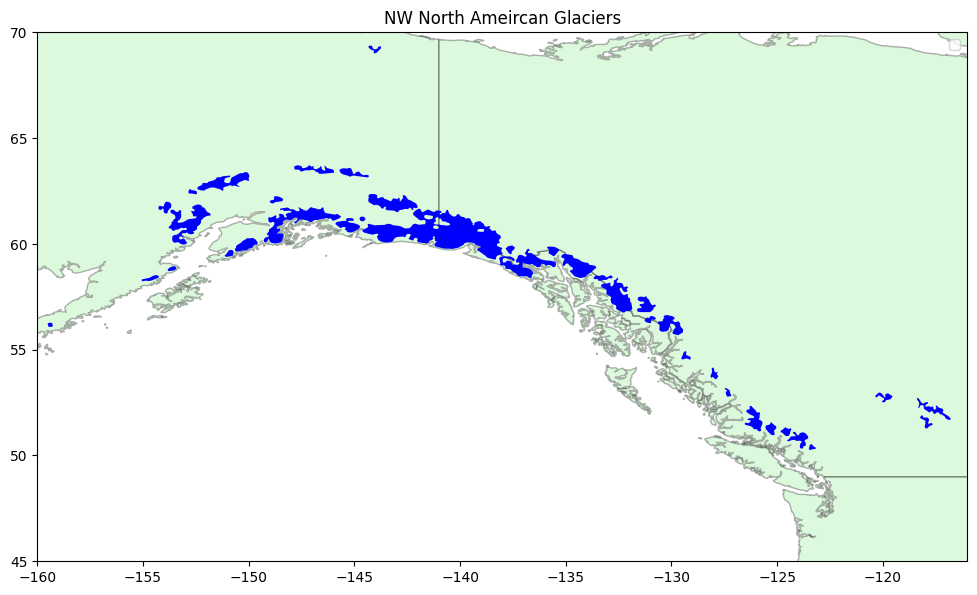

In [22]:
fig, ax = plt.subplots(figsize=(12, 10))


# Plot countries data
ctry.plot(ax=ax, color='lightgreen', edgecolor='black', alpha=0.3, label="Countries") #plotting countires
# Plot glacier data over countries
glacier.plot(ax=ax, color='blue', alpha=1, label="Glaciers")
ax.set_xlim([-160, -116]) #zooming in on alaska and canada.
ax.set_ylim([45, 70])

plt.legend()
plt.title("NW North Ameircan Glaciers")
plt.show()

In [142]:
raster_path = ("/content/drive/MyDrive/Classes Spring 2025/Conservation Coding/data/Tavg_annual_RCP85_2080_AK.zip (Unzipped Files)/Tavg_annual_RCP85_2080_AK.tif") #assigning url to raster and plotting it with raster.io This shows fututre tempature in alaska.

tiff = rasterio.open(raster_path)
raster_data = tiff.read(1)
raster_data.mean()



/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


np.float32(-inf)

###New Analysis One

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:777: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


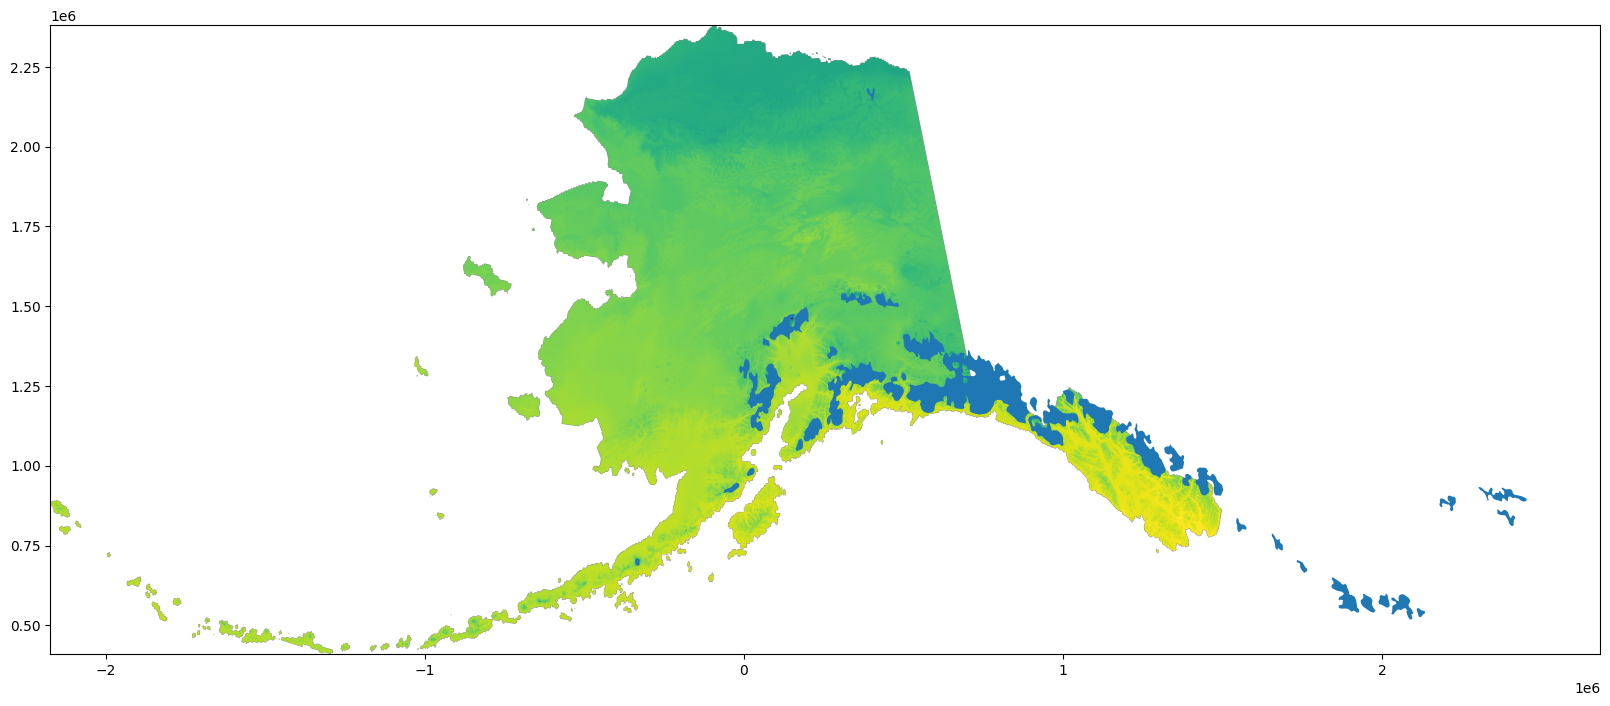

In [81]:
glacier = glacier.to_crs(tiff.crs) # setting vector crs to match raster crs,"Albers_Conic_Equal_Area"
west_glacier = glacier.iloc[35:73] # selecting for only ploygons near the raster

fig, ax = plt.subplots(figsize = (20,10)) # plotting the vector on the raster
rasterio.plot.show(tiff, ax=ax)
west_glacier.plot(ax=ax)

plt.show()


###Extracting Glacier Polygons

In [90]:
! pip install rasterstats
from rasterstats import zonal_stats

In [94]:
#using rasterstats' zonal stats to extract the polygons
result = zonal_stats(
    west_glacier,
    tiff.read(1),
    nodata = tiff.nodata,
    affine = tiff.transform,
    stats = ['mean', 'min', 'max']
)
result

[{'min': -5.484583377838135,
  'max': -1.064583420753479,
  'mean': -3.197176392315424},
 {'min': -10.427499771118164,
  'max': 4.59499979019165,
  'mean': -0.08241208035382615},
 {'min': -3.333750009536743,
  'max': 3.898750066757202,
  'mean': 1.2659144371560536},
 {'min': -3.9970831871032715,
  'max': 3.4024999141693115,
  'mean': -0.4150234834172964},
 {'min': -5.557916641235352,
  'max': 3.402916669845581,
  'mean': 0.0008428256952517698},
 {'min': -1.0695834159851074,
  'max': 4.070833206176758,
  'mean': 1.4743394118088942},
 {'min': -0.4425000250339508,
  'max': 8.614999771118164,
  'mean': 3.3284050870152115},
 {'mean': None, 'min': None, 'max': None},
 {'min': -2.4108333587646484,
  'max': 9.481249809265137,
  'mean': 2.1389334212342273},
 {'min': 0.753333330154419,
  'max': 7.4370832443237305,
  'mean': 3.8782490457241963},
 {'min': -1.5824999809265137,
  'max': 8.324167251586914,
  'mean': 4.4397582127074315},
 {'min': -2.0791666507720947,
  'max': 7.734583377838135,
  'mea

TypeError: gen_zonal_stats() missing 1 required positional argument: 'raster'

In [98]:
import pandas as pd

In [129]:
pd.DataFrame(result) # turning the dictionary of extracted values into a dataframe



,min,max,mean
0,-5.484583,-1.064583,-3.197176
1,-10.427500,4.595000,-0.082412
2,-3.333750,3.898750,1.265914
3,-3.997083,3.402500,-0.415023
4,-5.557917,3.402917,0.000843
5,-1.069583,4.070833,1.474339
6,-0.442500,8.615000,3.328405
7,NaN,NaN,NaN
8,-2.410833,9.481250,2.138933
9,0.753333,7.437083,3.878249


###New Analysis #2 Plotting the Extracted polygons
it would be really cool to have a line showing mean tempature for the entire raster.

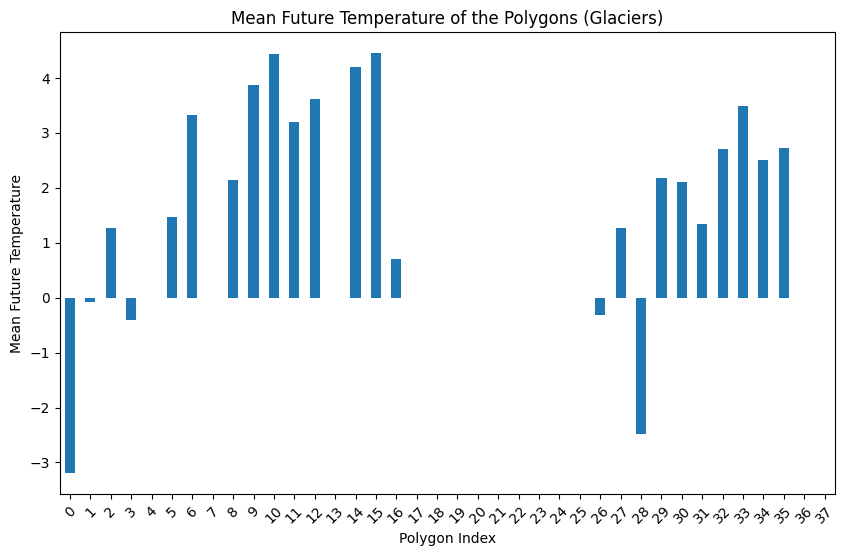

In [135]:


# Plot the 'mean' column from the DataFrame
polygonDf['mean'].plot(kind='bar', figsize=(10, 6))

# Adding labels and title
plt.title('Mean Future Temperature of the Polygons (Glaciers)')
plt.xlabel('Polygon Index')
plt.ylabel('Mean Future Temperature')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

# Show the plot

plt.show()

###Joining the Extracted Polygon data to the Vector data frame
This is to give the west_glacier dataframe vector objects the extracted raster data.

In [132]:
#creating new collumn in the west_glacier dataFrame, "polygons' The problem is that it stores the min and the min max and mean. they should all ghave thir own collumns.
west_glacier_olygons = west_glacier.copy()
west_glacier_polygons['polygons'] = result
west_glacier_polygons



,scalerank,featurecla,min_zoom,geometry,polygons
35,5,Glaciated Areas,5.0,"POLYGON ((391163.166 2163699.037, 391163.166 2...","{'min': -5.484583377838135, 'max': -1.06458342..."
36,3,Glaciated Areas,2.1,"POLYGON ((394225.148 1529098.141, 394225.148 1...","{'min': -10.427499771118164, 'max': 4.59499979..."
37,5,Glaciated Areas,5.0,"POLYGON ((67169.403 1378262.86, 67169.403 1378...","{'min': -3.333750009536743, 'max': 3.898750066..."
38,5,Glaciated Areas,5.0,"POLYGON ((282228.765 1371510.102, 282228.765 1...","{'min': -3.9970831871032715, 'max': 3.40249991..."
39,5,Glaciated Areas,5.0,"POLYGON ((17239.841 1303982.414, 17239.841 130...","{'min': -5.557916641235352, 'max': 3.402916669..."
40,5,Glaciated Areas,5.0,"POLYGON ((499094.724 1291864.48, 499094.724 12...","{'min': -1.0695834159851074, 'max': 4.07083320..."
41,3,Glaciated Areas,2.1,"POLYGON ((229267.198 1095035.71, 229267.198 10...","{'min': -0.4425000250339508, 'max': 8.61499977..."
42,5,Glaciated Areas,5.0,"POLYGON ((903063.129 1213279.727, 903063.129 1...","{'mean': None, 'min': None, 'max': None}"
43,5,Glaciated Areas,5.0,"POLYGON ((1027071.688 1232679.981, 1027071.688...","{'min': -2.4108333587646484, 'max': 9.48124980..."
44,3,Glaciated Areas,2.1,"POLYGON ((175594.412 1083640.831, 175594.412 1...","{'min': 0.753333330154419, 'max': 7.4370832443..."
